In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
import seaborn as sns

from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import discriminant_analysis

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

from sklearn import discriminant_analysis

In [2]:
from imblearn.under_sampling import ClusterCentroids

Import File into Panda DataFrame

In [ ]:
df = pd.read_csv("C:/Users/lina9/Desktop/credit card fraud detection/creditcard.csv")

Analysis of Data

In [58]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
np.array(df.isnull().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
dfFraud = df[df.Class==1]
dfNorm = df[df.Class==0]
ratio = float(len(dfFraud))/len(dfNorm)
print(ratio)

0.0017304750013189597


In [8]:
y_target = df.Class
X_data = df.drop(['Class'], axis=1)

Feature Selection using Linear Discriminant Analysis

Optimal number of features : 11


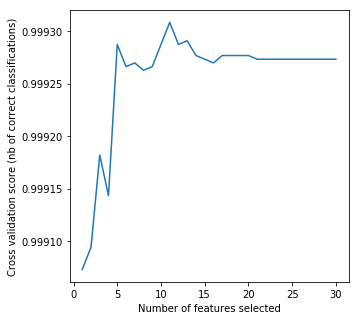

In [9]:
# Create the RFE object and compute a cross-validated score.
lda = discriminant_analysis.LinearDiscriminantAnalysis()#SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lda, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X_data, y_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [10]:
rfecv.grid_scores_

array([0.99907306, 0.99909412, 0.9991819 , 0.99914328, 0.99928724,
       0.99926617, 0.99926968, 0.99926266, 0.99926617, 0.99928724,
       0.9993083 , 0.99928724, 0.99929075, 0.9992767 , 0.99927319,
       0.99926968, 0.9992767 , 0.9992767 , 0.9992767 , 0.9992767 ,
       0.99927319, 0.99927319, 0.99927319, 0.99927319, 0.99927319,
       0.99927319, 0.99927319, 0.99927319, 0.99927319, 0.99927319])

In [11]:
rfecv.support_

array([False, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
rfecv.ranking_

array([20,  5,  3,  1,  1,  2,  8,  1, 11,  1,  1,  1,  1, 16,  1, 15,  1,
        1,  1,  7, 10,  4, 18, 17, 12, 14, 13,  6,  9, 19])

In [13]:
X_data.columns.values[rfecv.support_]

array(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'], dtype=object)

Split data in train and test dataset

In [14]:
#Shuffle the dataframes so that the training is done in a random order.
dfNorm = shuffle(dfNorm)
dfFraud = shuffle(dfFraud)

# Set X_train equal to 80% of the fraudulent transactions.
X_train = dfFraud.sample(frac=0.8)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, dfNorm.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

y_train = X_train['Class']
y_test = X_test['Class']

X_train = X_train.iloc[:,rfecv.support_]
X_test = X_test.iloc[:,rfecv.support_]

In [15]:
X_data.shape, X_train.shape, X_test.shape

((284807, 30), (227846, 11), (56961, 11))

In [16]:
X_train.columns.values

array(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'], dtype=object)

Resampling using Imbalanced Learn cluster centroids

In [17]:
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_sample(X_train, y_train)

In [18]:
X_train_ = X_resampled
y_train_ = y_resampled
X_test_ = X_test
y_test_ = y_test

In [19]:
X_train.shape, X_train_.shape, y_train.shape, y_train_.shape

((227846, 11), (788, 11), (227846,), (788,))

In [20]:
sum(y_train_==1), sum(y_train_==0)

(394, 394)

Principal Component Analysis

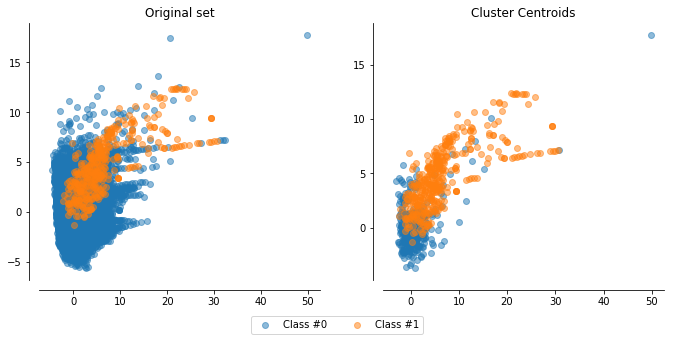

In [21]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)

# Apply SMOTE + ENN
#sm = SMOTEENN(ratio = 'minority')
#X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
plt.rcParams['figure.figsize'] = 10, 5
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y_train == 0, 0], X_vis[y_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y_train == 1, 0], X_vis[y_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
#ax2.set_title('SMOTE + ENN')
ax2.set_title('Cluster Centroids')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-6, 8])
    #ax.set_ylim([-6, 6])

f.legend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()


Build Model and Make Predictions

1. QDA 

In [22]:
QDA_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train_, y_train_)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [23]:
class_names = ["Normal", "Fraud"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
def plotConfusion(model, X, y):
    y_true, y_pred = y, model.predict(X)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()



In [25]:
y_pred = QDA_model.predict(X_test_)

In [50]:
accqda=round(QDA_model.score(X_test_, y_test_)*100)
print("accuracy:")
QDA_model.score(X_test_, y_test_)

accuracy:


0.9735257456856445

Normalized confusion matrix
[[0.97 0.03]
 [0.15 0.85]]


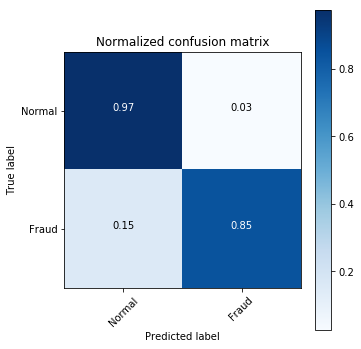

In [27]:
plotConfusion(QDA_model, X_test_, y_test_)

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
print(metrics.classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.85      0.10        98

   micro avg       0.97      0.97      0.97     56961
   macro avg       0.53      0.91      0.54     56961
weighted avg       1.00      0.97      0.99     56961



AUC: 0.946
AUROC curve:


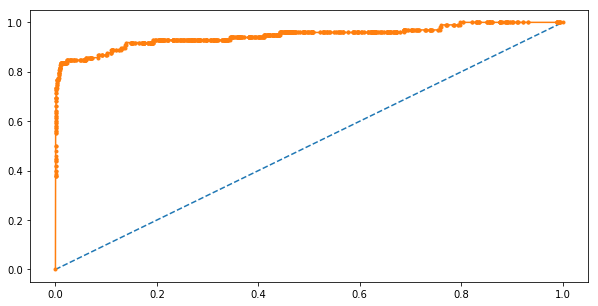

In [29]:
probability = QDA_model.predict_proba(X_test_)
probs = probability[:, 1]
qda_false_positive_rate,qda_true_positive_rate,qda_threshold = roc_curve(y_test_,
                                                             probs)
precision_QDA_model = round(precision_score(y_test_.astype(float), y_pred.astype(float), average='weighted')*100,2)
recall_QDA_model = round(recall_score(y_test_.astype(float), y_pred.astype(float), average='weighted')*100,2)
roc = roc_auc_score(y_test_.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test_.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("AUROC curve:")
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(discriminant_analysis.QuadraticDiscriminantAnalysis(), X_data, y_target, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_QDA_model = round(cross_val.mean()*100, 2)
print(cross_val_QDA_model)

Cross Validation value:
97.44


Make Prediction

In [59]:
x_test = pd.read_csv("C:/Users/lina9/Desktop/credit card fraud detection/book1.csv")
fraud = QDA_model.predict(x_test)
print(fraud)

[0 0]


2. Logistic Regression

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
#GridSearchCV(cv=None,
 #            estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
 #              dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
 #            param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
import warnings
warnings.filterwarnings('ignore')

In [32]:
#clf.fit(X_resampled2, y_resampled2)
clf.fit(X_train_, y_train_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
clf.best_params_

{'C': 0.01}

In [51]:
accclf=round(clf.score(X_test_, y_test_)*100,2)
print("accuracy:")
clf.score(X_test_, y_test_)

accuracy:


0.9812327733010305

Normalized confusion matrix
[[0.98 0.02]
 [0.13 0.87]]


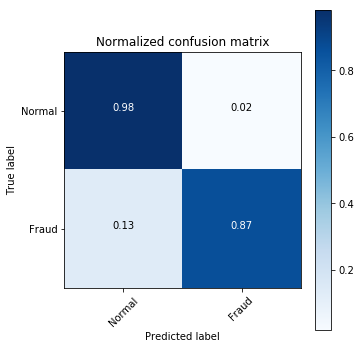

In [35]:
plotConfusion(clf, X_test_, y_test_)

Probability Threshold: 0.10
Recall metric: 1.00
Precision metric: 0.01
Probability Threshold: 0.20
Recall metric: 1.00
Precision metric: 0.05
Probability Threshold: 0.30
Recall metric: 0.99
Precision metric: 0.43
Probability Threshold: 0.40
Recall metric: 0.92
Precision metric: 0.88
Probability Threshold: 0.50
Recall metric: 0.87
Precision metric: 0.98
Probability Threshold: 0.60
Recall metric: 0.85
Precision metric: 0.99
Probability Threshold: 0.70
Recall metric: 0.82
Precision metric: 1.00
Probability Threshold: 0.80
Recall metric: 0.80
Precision metric: 1.00
Probability Threshold: 0.90
Recall metric: 0.70
Precision metric: 1.00


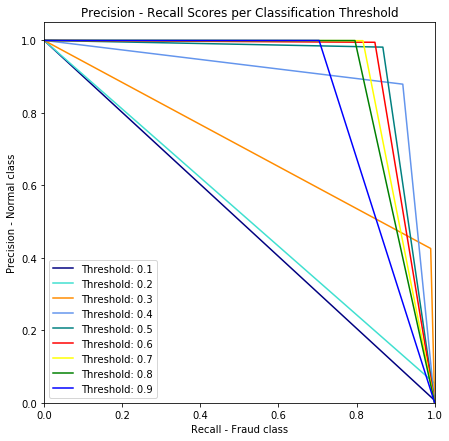

In [36]:
y_pred_test_proba = clf.predict_proba(X_test_)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

prec, rec = [],[]
for i in thresholds:
    y_test_predictions_high_recall = y_pred_test_proba[:,1] > i
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    p = float(cnf_matrix[0,0])/(cnf_matrix[0,1]+cnf_matrix[0,0])
    r = float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])
    rec.append(r)
    prec.append(p)

    print("Probability Threshold: {0:0.2f}".format(i))
    print("Recall metric: {0:0.2f}".format(r))
    print("Precision metric: {0:0.2f}".format(p))

plt.figure(figsize=(7,7))

for i,color,r,p in zip(thresholds,colors,rec,prec):
    plt.plot([0, r, 1], [1, p, 0],color=color, label='Threshold: %s'%i)
    plt.ylabel('Precision - Normal class')
    plt.xlabel('Recall - Fraud class')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision - Recall Scores per Classification Threshold')
    plt.legend(loc="lower left")

In [37]:
y_pred = clf.predict(X_test_)

In [38]:
print(metrics.classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.87      0.14        98

   micro avg       0.98      0.98      0.98     56961
   macro avg       0.54      0.92      0.56     56961
weighted avg       1.00      0.98      0.99     56961



AUC: 0.970
AUROC curve:


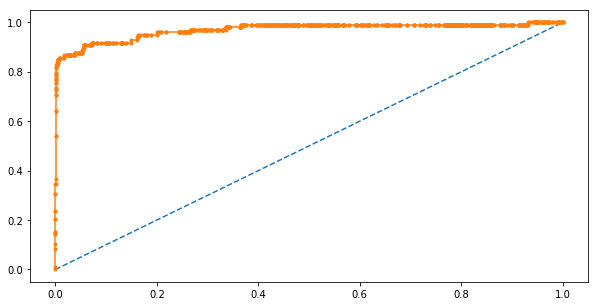

In [39]:
probability = clf.predict_proba(X_test_)
probs = probability[:, 1]
clf_false_positive_rate,clf_true_positive_rate,gb_threshold = roc_curve(y_test_,
                                                             probs)
precision_clf = round(precision_score(y_test_.astype(float), y_pred.astype(float), average='weighted')*100,2)
recall_clf = round(recall_score(y_test_.astype(float), y_pred.astype(float), average='weighted')*100,2)
roc = roc_auc_score(y_test_.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test_.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("AUROC curve:")
plt.show()

In [40]:
cross_val = cross_val_score(LogisticRegression(penalty='l2'), X_data, y_target, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_clf = round(cross_val.mean()*100, 2)
print(cross_val_clf)

Cross Validation value:
99.76


In [60]:
x_test = pd.read_csv("C:/Users/lina9/Desktop/credit card fraud detection/book1.csv")
fraud = clf.predict(x_test)
print(fraud)

[1 0]


3. Support Vector Machine

In [41]:
tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-3,  1e-4], 'C': [1,10,100,1000]}]
scores = ['precision', 'recall']

In [42]:
clg = svm.SVC(kernel='linear', C=1)
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5,scoring='%s_macro' % score)
    svm.fit(X_train_, y_train_)

    print("Best parameters set found on Training dataset:")
    print()
    print(svm.best_params_)
    print()
    means = svm.cv_results_['mean_test_score']
    stds = svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true_test_svm, y_pred_test_svm = y_test_, svm.predict(X_test_)
    print(classification_report(y_true_test_svm, y_pred_test_svm))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on Training dataset:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

0.928 (+/-0.029) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.830 (+/-0.030) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.910 (+/-0.017) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.353 (+/-0.412) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.923 (+/-0.036) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.857 (+/-0.016) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.926 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.766 (+/-0.041) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.928 (+/-0.040) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.901 (+/-0.015) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.923 (+/-0.036) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.780 (+/-0.031) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.927 (+/-0.032) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.907 (+/-0.016) for

In [52]:
accsvm = round(svm.score(X_test_, y_test_)*100,2)
print("accuracy:")
svm.score(X_test_, y_test_)

accuracy:


0.9306310692329971

Normalized confusion matrix
[[0.99 0.01]
 [0.13 0.87]]


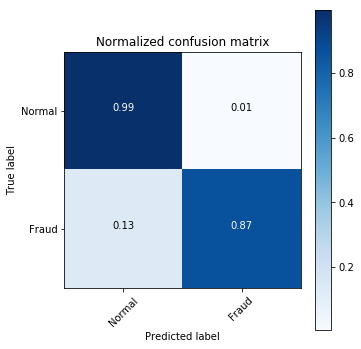

In [44]:
plotConfusion(svm, X_test_, y_test_)

In [45]:
y_pred = svm.predict(X_test_)

In [46]:
print(metrics.classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.87      0.32        98

   micro avg       0.99      0.99      0.99     56961
   macro avg       0.60      0.93      0.66     56961
weighted avg       1.00      0.99      1.00     56961



AUC: 0.971
AUROC curve:


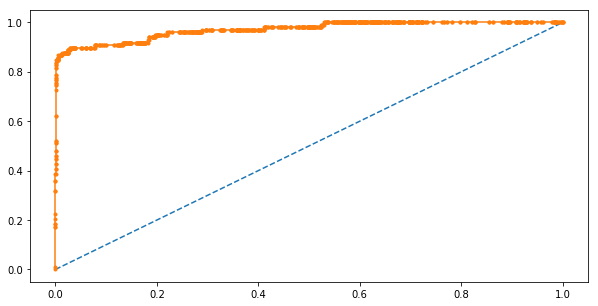

In [47]:
probability = svm.predict_proba(X_test_)
probs = probability[:, 1]
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test_,
                                                             probs)
precision_svm = round(precision_score(y_test_.astype(float), y_pred.astype(float), average='weighted')*100,2)
recall_svm = round(recall_score(y_test_.astype(float), y_pred.astype(float), average='weighted')*100,2)
roc = roc_auc_score(y_test_.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test_.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("AUROC curve:")
plt.show()

In [61]:
x_test = pd.read_csv("C:/Users/lina9/Desktop/credit card fraud detection/book1.csv")
fraud = svm.predict(x_test)
print(fraud)

[0 0]


Comparison of QDA, Logistic Regression and SVM

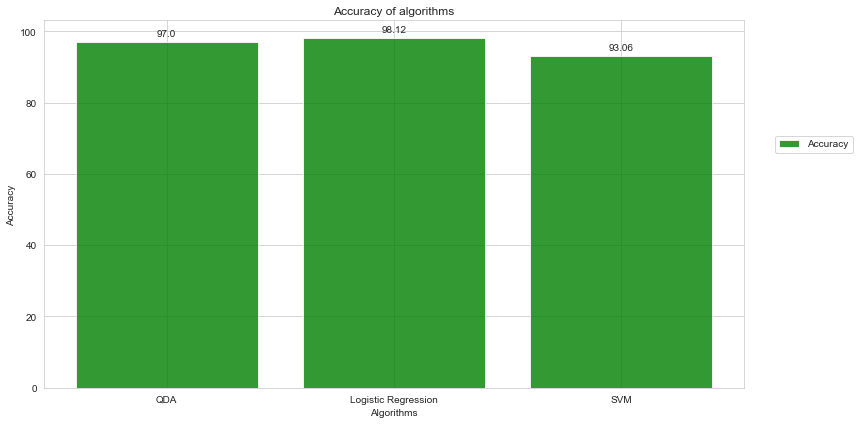

In [53]:
plt.rcParams['figure.figsize']=(12,6)
algorithm = ['QDA', 'Logistic Regression', 'SVM']
testaccuracy = [accqda, accclf, accsvm]
index = np.arange(len(algorithm))

fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.8

rects2 = plt.bar(index, testaccuracy, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Accuracy')
 
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of algorithms')
plt.xticks(index, algorithm)
plt.legend(loc=9, bbox_to_anchor=(1.1, 0.7), ncol=1) 
plt.tight_layout()
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects2, "center")
plt.show()

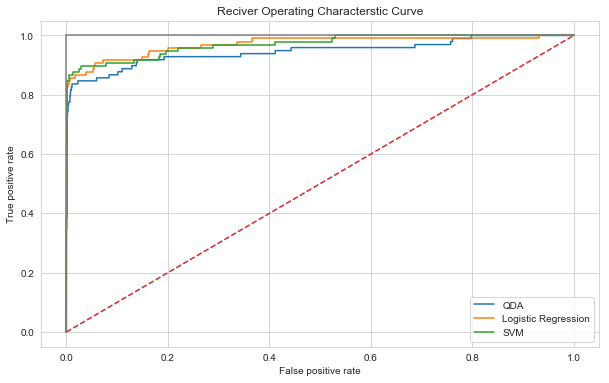

In [49]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(qda_false_positive_rate,qda_true_positive_rate,label='QDA')
plt.plot(clf_false_positive_rate,clf_true_positive_rate,label='Logistic Regression')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='SVM')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

From the comparisons we can conclude that Logistic Regression has the best performance in all the three algorithms.

Predicted values using logistic regression algorithm

In [77]:
x_test = pd.read_csv("C:/Users/lina9/Desktop/credit card fraud detection/book1.csv")
fraud = clf.predict(x_test)
for i in range(len(fraud)):
    if fraud[i]==1:
        print(str(x_test.loc[[i]]), end='')
        print("Fraud")
    else:
        print(str(x_test.loc[[i]]), end='')
        print("No fraud")

         V3        V4        V7        V9       V10       V11       V12  \
0  1.088463  2.288644  0.325574 -0.270953 -0.838587 -0.414575 -0.503141   

        V14      V16       V17       V18  
0 -1.692029  0.66678  0.599717  1.725321  Fraud
         V3        V4        V7        V9       V10       V11       V12  \
1  1.548718  0.403034  0.592941  0.817739  0.753074 -0.822843  0.538196   

       V14       V16       V17       V18  
1 -1.11967 -0.451449 -0.237033 -0.038195  No fraud
